In [1]:
import re
import cv2
import pytesseract
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

In [2]:
def x_cord_contour(contour):
    M = cv2.moments(contour)
    return (int(M['m10']/M['m00']))


def text_detection(path, AREA=10, W=10, H=10):
    
    '''path: 원본 이미지 경로
       AREA: 감지된 영역의 넓이 최솟값
       W: 감지된 영역의 폭 최솟값
       H: 감지된 영역의 높이 최솟값'''
    
    # preprocessing
    image = cv2.imread(path)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # 흑백
    blurred = cv2.GaussianBlur(gray, (5, 5), 0) # 블러
    edged = cv2.Canny(blurred, 30, 150) # 가장자리 감지
    
    # detection
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = [c for c in contours if cv2.contourArea(c) >= AREA]
    contours = sorted(filtered_contours, key=x_cord_contour, reverse = False)

    img = Image.open(path)
    crop_imgs = []

    for i in range(len(contours)):
        (x, y, w, h) = cv2.boundingRect(contours[i])

        if w >= W and h >= H:
            area = (x, y, x+w, y+h)
            crop_imgs.append(img.crop(area).resize((100, 100)))
    
    # show
    fig, axes = plt.subplots(1, len(crop_imgs), figsize=(12, 5))
    for idx, image in enumerate(crop_imgs):
        axes[idx].imshow(image)
        axes[idx].set_xticks([])
        axes[idx].set_yticks([])

    print("Text: " + re.sub('[^a-zA-Z]', '', pytesseract.image_to_string(img, config='-l eng --oem 1 --psm 3')))

### RESULTS

- 이미지가 무엇인지에 따라 성능 차이가 큼
- 이미지에 따라 text_detection의 파라미터 AREA, W, H 조절 필요

▶ 실시간 크롤링 대신에 미리 크롤링 된 이미지 중 직접 선별하여 text_detection한 데이터를 많이 확보하고, 이들 중 랜덤으로 선택되도록 모델 설계?

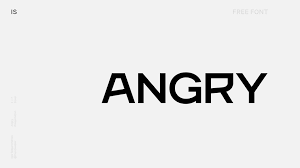

In [3]:
# 1
path = './img/anger font_1.jpg'
Image.open(path)

Text: ANGRY


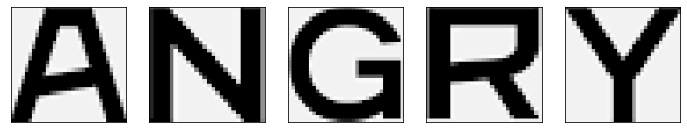

In [4]:
text_detection(path)

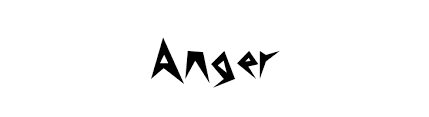

In [5]:
# 2
path = './img/anger font_3.jpg'
Image.open(path)

Text: Anser


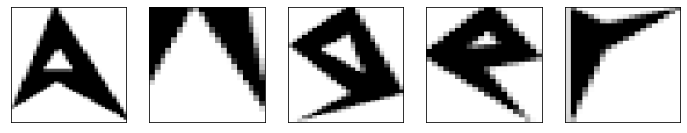

In [11]:
text_detection(path)

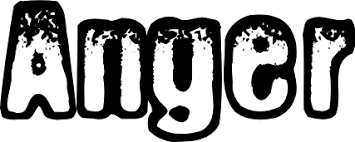

In [18]:
# 3
path = './img/anger font_10.jpg'
Image.open(path)

Text: 


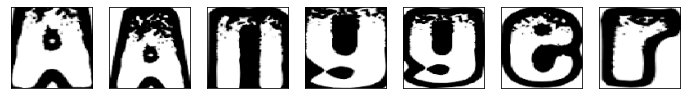

In [35]:
text_detection(path, W=50, H=50)

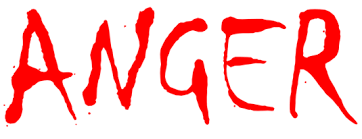

In [40]:
# 4
path = './img/anger font_33.jpg'
Image.open(path)

Text: 


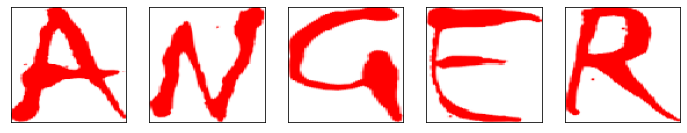

In [41]:
text_detection(path)

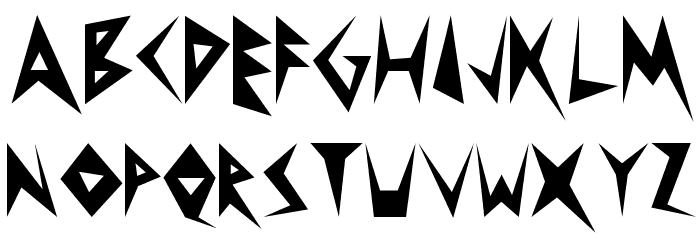

In [60]:
# 5
path = './img/anger typeface_7.jpg'
Image.open(path)

Text: ABVEFGHINKEMNOPORCTWVWYZ


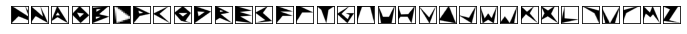

In [62]:
text_detection(path)

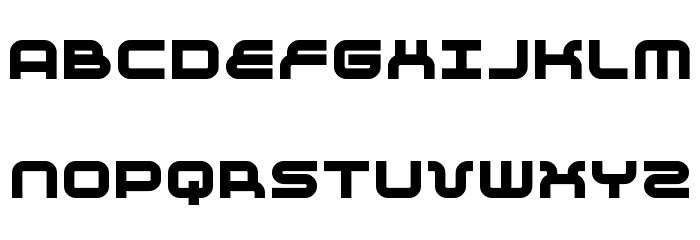

In [65]:
# 6
path = './img/negative font_49.jpg'
Image.open(path)

Text: ABCDEFEGALIIJALMNOPGARSTUVWHMYeS


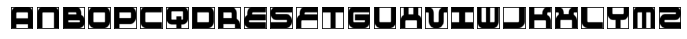

In [64]:
text_detection(path)